<a href="https://colab.research.google.com/github/Karma-tic/AI-Image-Caption-Generator/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os
import pickle
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# --- UPDATE THESE PATHS ---

# This is the path to the folder containing your 5,000 validation images
VAL_IMG_FOLDER = "/content/drive/My Drive/Evoastra - Team C Project/COCO2017_unzipped/val2017/"

# This is where your new feature file will be saved
OUTPUT_FILE_PATH = "/content/drive/My Drive/Evoastra - Team C Project/val_features.pkl"

# --- END OF PATHS ---

print(f"Loading images from: {VAL_IMG_FOLDER}")
print(f"Saving features to: {OUTPUT_FILE_PATH}")

Loading images from: /content/drive/My Drive/Evoastra - Team C Project/COCO2017_unzipped/val2017/
Saving features to: /content/drive/My Drive/Evoastra - Team C Project/val_features.pkl


In [3]:
# Load the InceptionV3 model, pre-trained on ImageNet
# include_top=False removes the final classification layer
image_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

# Create a new model that outputs the last convolutional layer
# This is our feature extractor
feature_extractor = Model(inputs=image_model.inputs, outputs=image_model.layers[-1].output)

print("InceptionV3 feature extractor model loaded.")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
InceptionV3 feature extractor model loaded.


In [4]:
def preprocess_image(image_path):
    # Load the image, resizing to 299x299 (required by InceptionV3)
    img = load_img(image_path, target_size=(299, 299))

    # Convert image to a 3D numpy array
    img_array = img_to_array(img)

    # Add a 4th dimension (batch size)
    img_array = tf.expand_dims(img_array, axis=0)

    # Preprocess the image for InceptionV3 (scales pixel values)
    img_array = inception_v3.preprocess_input(img_array)

    return img_array

print("Preprocessing function defined.")

Preprocessing function defined.


In [6]:
# Save the completed dictionary to your Google Drive
with open(OUTPUT_FILE_PATH, 'wb') as f:
    pickle.dump(features_dict, f)

print(f"Successfully saved all features to: {OUTPUT_FILE_PATH}")

Successfully saved all features to: /content/drive/My Drive/Evoastra - Team C Project/val_features.pkl


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


--- Libraries installed and imported. ---
Loading pre-trained model (Salesforce/blip-image-captioning-large)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

--- Model loaded successfully! ---
Generating caption...


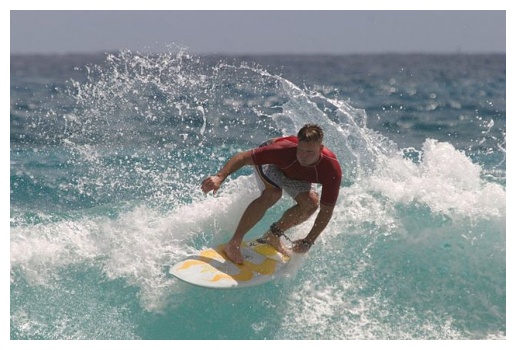

MODEL PREDICTION: surfer riding a wave in the ocean on a sunny day


In [2]:
# --- 1. INSTALL AND IMPORT LIBRARIES ---
# We need to install the 'transformers' library from Hugging Face
!pip install transformers

import requests
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

print("--- Libraries installed and imported. ---")

# --- 2. LOAD THE PRE-TRAINED MODEL ---
# This will download the 'BLIP' model from Salesforce/Hugging Face
# It's a large model, so this might take 2-3 minutes.
print("Loading pre-trained model (Salesforce/blip-image-captioning-large)...")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# If you have a GPU, move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("--- Model loaded successfully! ---")


# --- 3. LOAD THE TEST IMAGE ---
# We'll use the surfer image again to see the difference.
image_url = 'https://tensorflow.org/images/surf.jpg'
raw_image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')


# --- 4. GENERATE THE CAPTION ---
print("Generating caption...")

# Process the image (resize, normalize, etc.)
inputs = processor(raw_image, return_tensors="pt").to(device)

# Generate the caption (this tells the model to create text)
out = model.generate(**inputs)

# Decode the generated text
predicted_caption = processor.decode(out[0], skip_special_tokens=True)


# --- 5. SHOW THE RESULT ---
plt.imshow(raw_image)
plt.axis('off')
plt.show()

print(f"MODEL PREDICTION: {predicted_caption}")